<a href="https://colab.research.google.com/github/e-fort/campaign-post-sale-report/blob/main/notebooks/post_sale_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 1) Ler o CSV do GitHub (por enquanto vamos baixar direto do repositório depois)
# No começo, vamos simular lendo o arquivo local, pois o Colab vai receber upload.

import pandas as pd

url = "https://raw.githubusercontent.com/e-fort/campaign-post-sale-report/refs/heads/main/data/data/campaign_data.csv"

df = pd.read_csv(url)

df.head()

,date,platform,campaign,objective,format,placement,audience,spend,impressions,reach,clicks,video_views,video_completions
0,2026-01-01,Meta,Globo_Awareness_01,Awareness,Video,Feed,Broad,1200,180000,52000,540,52000,18200
1,2026-01-02,Meta,Globo_Awareness_01,Awareness,Video,Reels,Broad,900,150000,61000,420,68000,22000
2,2026-01-03,Meta,Globo_Awareness_01,Awareness,Video,Stories,Interest,750,120000,46000,300,54000,16500
3,2026-01-04,Google,Globo_Awareness_01,Awareness,Video,YouTube In-Stream,Affinity,1600,210000,78000,680,72000,19500
4,2026-01-05,Google,Globo_Awareness_01,Awareness,Display,GDN,Custom Intent,800,260000,92000,980,0,0


In [4]:
# CPM = custo por mil impressões
df["cpm"] = (df["spend"] / df["impressions"]) * 1000

# CTR = taxa de clique
df["ctr"] = (df["clicks"] / df["impressions"]) * 100

# VTR = taxa de conclusão de vídeo (quando houver vídeo)
df["vtr"] = df.apply(
    lambda row: (row["video_completions"] / row["video_views"]) * 100
    if row["video_views"] > 0 else None,
    axis=1
)

df.head()


,date,platform,campaign,objective,format,placement,audience,spend,impressions,reach,clicks,video_views,video_completions,cpm,ctr,vtr
0,2026-01-01,Meta,Globo_Awareness_01,Awareness,Video,Feed,Broad,1200,180000,52000,540,52000,18200,6.666667,0.300000,35.000000
1,2026-01-02,Meta,Globo_Awareness_01,Awareness,Video,Reels,Broad,900,150000,61000,420,68000,22000,6.000000,0.280000,32.352941
2,2026-01-03,Meta,Globo_Awareness_01,Awareness,Video,Stories,Interest,750,120000,46000,300,54000,16500,6.250000,0.250000,30.555556
3,2026-01-04,Google,Globo_Awareness_01,Awareness,Video,YouTube In-Stream,Affinity,1600,210000,78000,680,72000,19500,7.619048,0.323810,27.083333
4,2026-01-05,Google,Globo_Awareness_01,Awareness,Display,GDN,Custom Intent,800,260000,92000,980,0,0,3.076923,0.376923,NaN


In [5]:
summary = df.groupby("platform").agg(
    spend=("spend", "sum"),
    impressions=("impressions", "sum"),
    reach=("reach", "sum"),
    clicks=("clicks", "sum"),
    video_views=("video_views", "sum"),
    video_completions=("video_completions", "sum"),
).reset_index()

summary["cpm"] = (summary["spend"] / summary["impressions"]) * 1000
summary["ctr"] = (summary["clicks"] / summary["impressions"]) * 100
summary["vtr"] = summary.apply(
    lambda row: (row["video_completions"] / row["video_views"]) * 100
    if row["video_views"] > 0 else None,
    axis=1
)

summary.sort_values("cpm")


,platform,spend,impressions,reach,clicks,video_views,video_completions,cpm,ctr,vtr
2,TikTok,2000,440000,193000,940,157000,45000,4.545455,0.213636,28.662420
1,Meta,4350,840000,311000,2380,224000,73700,5.178571,0.283333,32.901786
0,Google,3800,665000,246000,2290,141000,38500,5.714286,0.344361,27.304965


In [6]:
best_cpm = summary.loc[summary["cpm"].idxmin()]
best_ctr = summary.loc[summary["ctr"].idxmax()]

print("Plataforma mais eficiente em CPM:")
print(best_cpm["platform"], "-", round(best_cpm["cpm"],2))

print("\nPlataforma com melhor CTR:")
print(best_ctr["platform"], "-", round(best_ctr["ctr"],2))


Plataforma mais eficiente em CPM:
TikTok - 4.55

Plataforma com melhor CTR:
Google - 0.34


In [7]:
summary.to_csv("summary_by_platform.csv", index=False)
print("Arquivo exportado.")


Arquivo exportado.


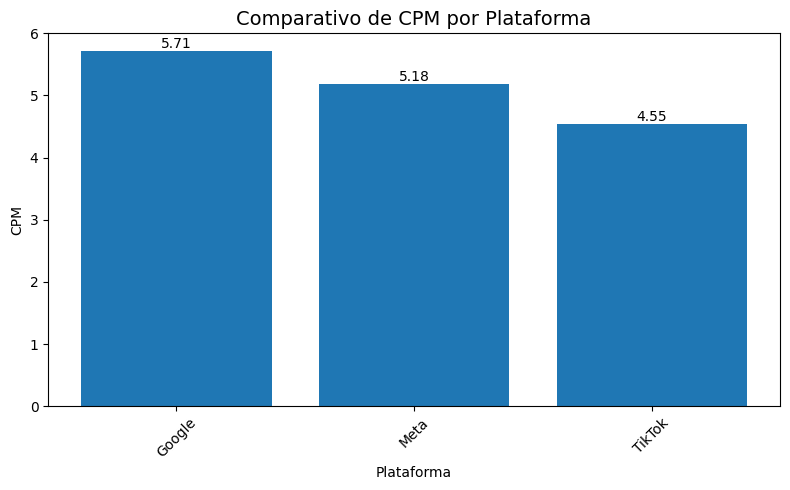

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

bars = plt.bar(summary["platform"], summary["cpm"])

plt.title("Comparativo de CPM por Plataforma", fontsize=14)
plt.ylabel("CPM")
plt.xlabel("Plataforma")

plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()
